In [308]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

In [309]:
def _dist(p: np.ndarray, q: np.ndarray) -> float:
    # compute and return the euclidean distance
    # put your code here
    return np.linalg.norm(p - q)

In [310]:
def _eps_neighborhood(p: np.ndarray, q: np.ndarray, eps: float) -> bool:
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    return _dist(p, q) < eps

In [311]:
def _region_query(m: np.ndarray, point_id: int, eps: float) -> list:
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    for i in range(n_points):
        if _eps_neighborhood(m[:, point_id], m[:, i], eps) == True:
            seeds.append(i)
    
    return seeds

In [312]:
def _expand_cluster(m: np.ndarray, classifications: list, point_id: int, cluster_id: int, eps: float, min_points: int) -> bool:
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    if classifications[point_id] != UNCLASSIFIED:
        raise AttributeError(f"point_id: {point_id} is classified")

    points = _region_query(m, point_id, eps)  # the points waiting for checking (becoming core)
    if len(points) <= min_points:  ### the count of neighbor is len(points) - 1 ###
        return False  # point_id is Noise
    # else: point_id is Core

    point = points.pop()
    while True:
        if classifications[point] == UNCLASSIFIED:  # point is not visited
            seeds = _region_query(m, point, eps)  # visit point
            if len(seeds) > min_points:  ### the count of neighbor is len(points) - 1 ###
                # point is Core
                points += seeds
            # else: point is Border
            classifications[point] = cluster_id  # classify point
        elif classifications[point] == NOISE:  # point is visited
            # point is Border
            classifications[point] = cluster_id  # classify point
        
        # continue?
        if len(points) == 0:
            return True  # point_id is Core
        else:
            point = points.pop()  # continue

In [313]:
def dbscan(m: np.ndarray, eps: float, min_points: int):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here

    for i in range(n_points):
        if classifications[i] != False:  # this point is visited
            continue

        if _expand_cluster(m, classifications, i, cluster_id, eps, min_points) == False:  # Noise
            classifications[i] = NOISE
            # it is not necessary to update the cluster_id
        else:  # it is a core
            # core is classified by _expand_cluster()
            cluster_id += 1  # update the cluster_id
    
    return classifications

In [314]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [315]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

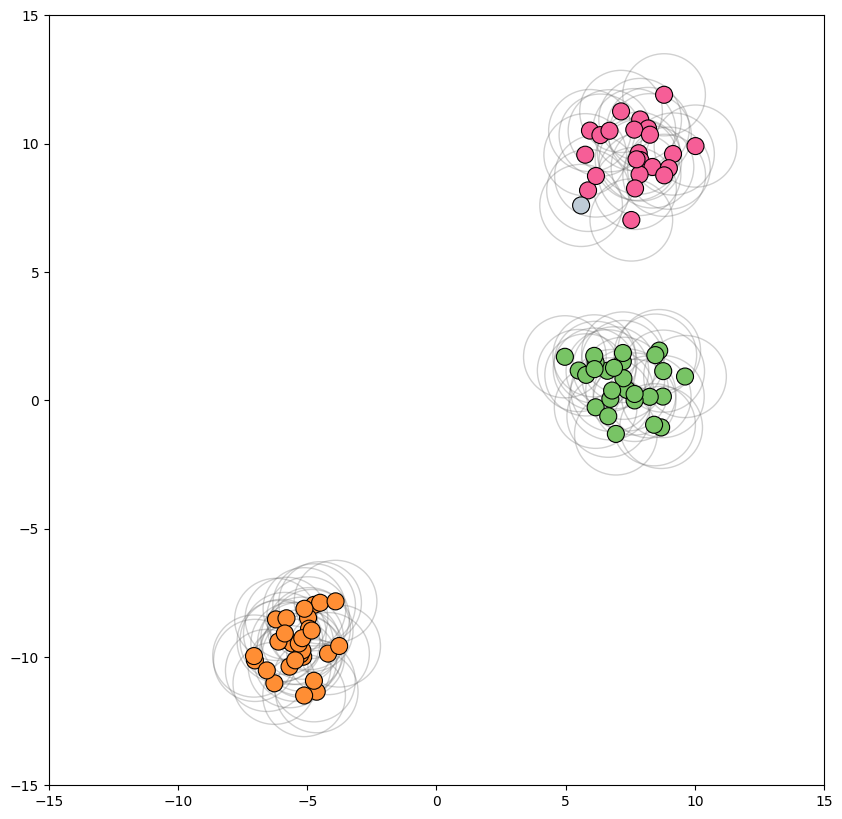

In [316]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [317]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [318]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

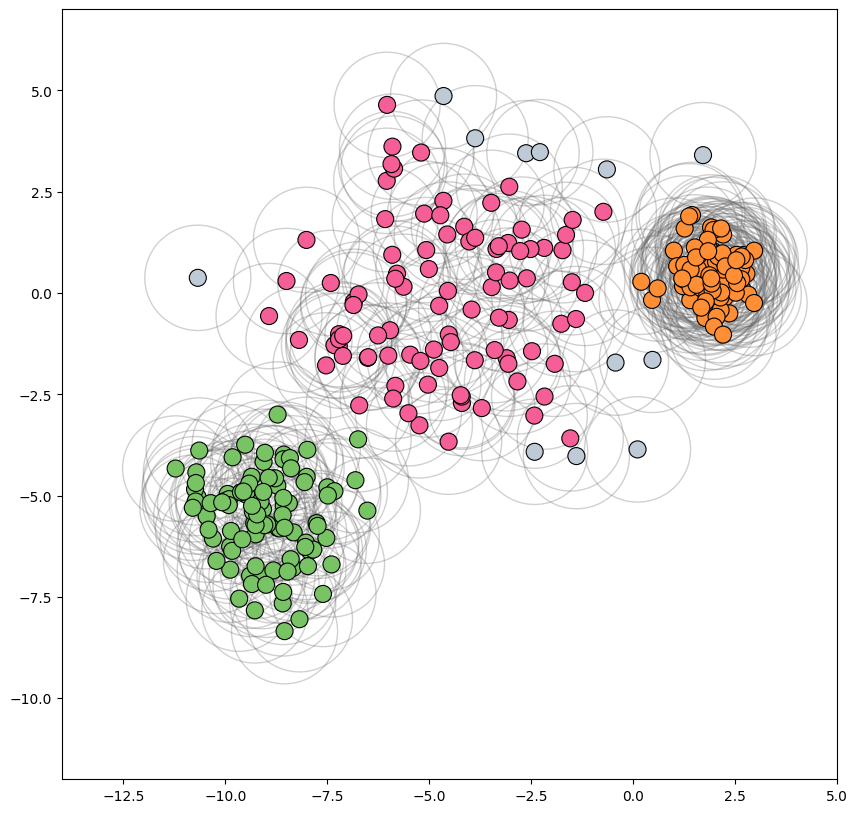

In [319]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
